In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Files to load from csv
file_train_summary=Path("Resources/Summary.csv")
file_housing=Path("Resources/Housing_data.csv")
train_df=pd.read_csv(file_train_summary)
housing_df=pd.read_csv(file_housing)

housing_df.iloc[:,5:]=housing_df.iloc[:,5:].replace({",":""}, regex=True).astype(int)
map_df=housing_df.iloc[:,0:4]
housing_df.head()

map_df.reset_index(drop=True, inplace=True)
map_df.drop_duplicates(inplace=True)
map_df

,With train,City Council_format2,City Council_only with train,City Council
0,No,Alpine Shire,NaN,Alpine S
4,No,Ararat Rural City,NaN,Ararat Rural C
8,No,Ballarat City,NaN,Ballarat C
12,Yes,Banyule City,Banyule C,Banyule C
16,No,Bass Coast Shire,NaN,Bass Coast S
...,...,...,...,...
300,No,Wodonga City,NaN,Wodonga C
304,Yes,Wyndham City,Wyndham C,Wyndham C
308,Yes,Yarra City,Yarra C,Yarra C
312,Yes,Yarra Ranges Shire,Yarra Ranges S,Yarra Ranges S


In [3]:
housing_grouped=housing_df.groupby("City Council")[["House Number of Sales","Unit/Apartment Number of Sales","Vacant House Number of Sales","Total Number of Sales"]].sum()
housing_grouped.reset_index(inplace=True)
housing_grouped=housing_grouped.merge(map_df, on="City Council", how="left")
housing_grouped

,City Council,House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales,With train,City Council_format2,City Council_only with train
0,Alpine S,928,220,343,1491,No,Alpine Shire,NaN
1,Ararat Rural C,820,93,109,1022,No,Ararat Rural City,NaN
2,Ballarat C,9236,1918,6354,17508,No,Ballarat City,NaN
3,Banyule C,5178,3739,82,8999,Yes,Banyule City,Banyule C
4,Bass Coast S,4619,790,2756,8165,No,Bass Coast Shire,NaN
...,...,...,...,...,...,...,...,...
75,Wodonga C,3012,529,1575,5116,No,Wodonga City,NaN
76,Wyndham C,17202,1971,13954,33127,Yes,Wyndham City,Wyndham C
77,Yarra C,3141,5262,8,8411,Yes,Yarra City,Yarra C
78,Yarra Ranges S,8151,1717,803,10671,Yes,Yarra Ranges Shire,Yarra Ranges S


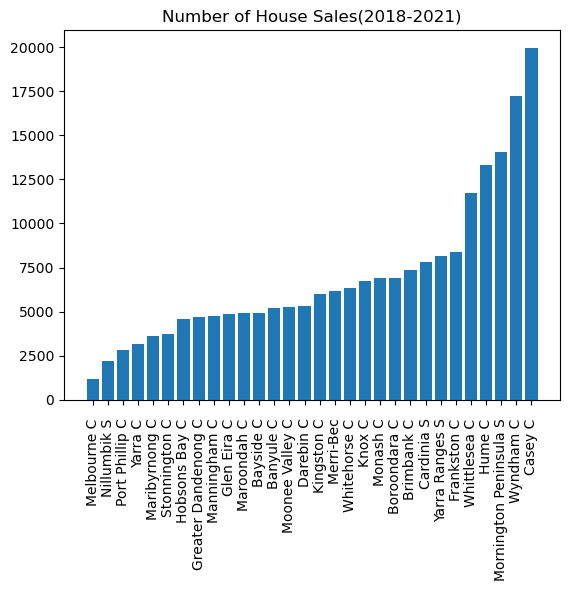

In [4]:
housing_grouped_train=housing_grouped.loc[housing_grouped["With train "]=="Yes"]
housing_grouped_train=housing_grouped_train.sort_values(by='House Number of Sales', ascending=True)
plt.bar(housing_grouped_train["City Council"],housing_grouped_train["House Number of Sales"])
plt.title("Number of House Sales(2018-2021)")
plt.xticks(rotation=90)
plt.show()

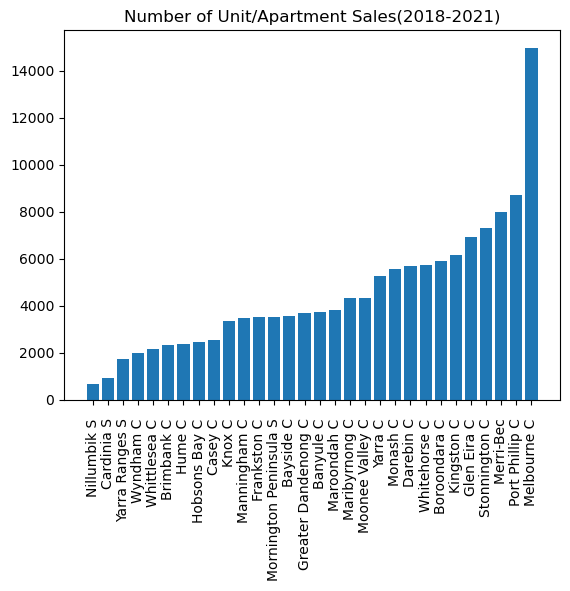

In [5]:
housing_grouped_train=housing_grouped.loc[housing_grouped["With train "]=="Yes"]
housing_grouped_train=housing_grouped_train.sort_values(by="Unit/Apartment Number of Sales", ascending=True)
plt.bar(housing_grouped_train["City Council"],housing_grouped_train["Unit/Apartment Number of Sales"])
plt.title("Number of Unit/Apartment Sales(2018-2021)")
plt.xticks(rotation=90)
plt.show()

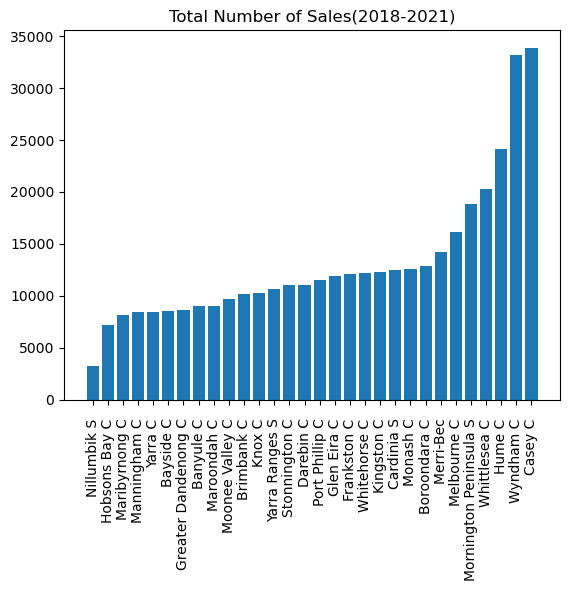

In [6]:
housing_grouped_train=housing_grouped.loc[housing_grouped["With train "]=="Yes"]
housing_grouped_train=housing_grouped_train.sort_values(by='Total Number of Sales', ascending=True)
plt.bar(housing_grouped_train["City Council"],housing_grouped_train["Total Number of Sales"])
plt.title("Total Number of Sales(2018-2021)")

plt.xticks(rotation=90)
plt.show()

In [7]:
housing_grouped_train.columns

Index(['City Council', 'House Number of Sales',
       'Unit/Apartment Number of Sales', 'Vacant House Number of Sales',
       'Total Number of Sales', 'With train ', 'City Council_format2',
       'City Council_only with train'],
      dtype='object')

In [8]:
train_df.columns

Index(['City council', 'Distance', 'TotalAnnual', 'TotalAMPeak', 'TotalPMPeak',
       'TotalWeekday', 'TotalWeekend', 'TotalOffpeak', 'TotalIncrease(%)',
       'WeekdayIncrease(%)', 'AMIncrease(%)', 'PMIncrease(%)',
       'OffPeakIncrease(%)', 'WeekendIncrease(%)'],
      dtype='object')

In [9]:
#rename the "City Council" to "City council" in housing_grouped_train
housing_grouped_train=housing_grouped_train.rename(columns={"City Council":"City council"})
# Merge the two dataframes on the "City council" column
merged_df = pd.merge(train_df, housing_grouped_train, on="City council", how="left")
merged_df



,City council,Distance,TotalAnnual,TotalAMPeak,TotalPMPeak,TotalWeekday,TotalWeekend,TotalOffpeak,TotalIncrease(%),WeekdayIncrease(%),...,PMIncrease(%),OffPeakIncrease(%),WeekendIncrease(%),House Number of Sales,Unit/Apartment Number of Sales,Vacant House Number of Sales,Total Number of Sales,With train,City Council_format2,City Council_only with train
0,Banyule C,13.392110,16823150.0,26600.0,13450.0,59200.0,49850.0,20300.0,57.926785,55.696203,...,77.142857,55.905512,80.970149,5178,3739,82,8999.0,Yes,Banyule City,Banyule C
1,Bayside C,14.183177,19655550.0,28450.0,13250.0,63400.0,70800.0,21850.0,66.655851,63.020833,...,64.285714,62.992126,79.283887,4944,3544,42,8530.0,Yes,Bayside City,Bayside C
2,Boroondara C,9.023778,26341800.0,31350.0,33400.0,94000.0,74000.0,32300.0,66.560298,64.860427,...,64.788732,74.331551,80.906921,6886,5905,85,12876.0,Yes,Boroondara City,Boroondara C
3,Brimbank C,16.208247,19624650.0,29200.0,10750.0,66650.0,60750.0,26700.0,50.600815,49.802372,...,51.282051,48.979592,54.838710,7337,2317,478,10132.0,Yes,Brimbank City,Brimbank C
4,Cardinia S,48.815247,5640200.0,9100.0,3100.0,20550.0,14150.0,8950.0,149.974356,138.541667,...,138.461538,120.930233,196.296296,7831,925,3682,12438.0,Yes,Cardina Shire,Cardinia S
5,Casey C,38.423380,14640650.0,21750.0,8000.0,52900.0,38050.0,23300.0,90.475990,83.763838,...,109.375000,84.482759,127.083333,19965,2543,11347,33855.0,Yes,Casey City,Casey C
6,Darebin C,8.325017,22618650.0,33100.0,16400.0,75850.0,76200.0,28000.0,74.413574,71.428571,...,94.444444,76.100629,87.710843,5299,5696,53,11048.0,Yes,Darebin City,Darebin C
7,Frankston C,37.594584,6626350.0,6950.0,4300.0,21100.0,26250.0,11050.0,73.995852,70.229008,...,84.000000,73.846154,90.140845,8378,3499,263,12140.0,Yes,Frankston City,Frankston C
8,Glen Eira C,10.860237,24589800.0,31150.0,21350.0,82600.0,91750.0,30350.0,61.875909,61.489699,...,68.518519,58.649789,68.815592,4890,6940,40,11870.0,Yes,Glen Eira City,Glen Eira C
9,Greater Dandenong C,24.980748,18560600.0,20300.0,17550.0,63450.0,61500.0,25650.0,77.955547,76.800000,...,90.526316,77.702703,89.425982,4690,3680,280,8650.0,Yes,Greater Dandenong City,Greater Dandenong C


In [10]:
#Storing merged_df to be used in other notebooks (PT)
%store merged_df

Stored 'merged_df' (DataFrame)


In [11]:
#transform housing_df DataFrame into a pivot table format based on years(2018-2021) 
pivot_housing=housing_df.pivot(index=["With train ","City Council","City Council_format2"], columns="Year", values=["House Number of Sales","Unit/Apartment Number of Sales", "Vacant House Number of Sales","Total Number of Sales"])

pivot_housing.columns

MultiIndex([(         'House Number of Sales', 2018),
            (         'House Number of Sales', 2019),
            (         'House Number of Sales', 2020),
            (         'House Number of Sales', 2021),
            ('Unit/Apartment Number of Sales', 2018),
            ('Unit/Apartment Number of Sales', 2019),
            ('Unit/Apartment Number of Sales', 2020),
            ('Unit/Apartment Number of Sales', 2021),
            (  'Vacant House Number of Sales', 2018),
            (  'Vacant House Number of Sales', 2019),
            (  'Vacant House Number of Sales', 2020),
            (  'Vacant House Number of Sales', 2021),
            (         'Total Number of Sales', 2018),
            (         'Total Number of Sales', 2019),
            (         'Total Number of Sales', 2020),
            (         'Total Number of Sales', 2021)],
           names=[None, 'Year'])

In [12]:
# Flatten the MultiIndex columns
pivot_housing.columns = [f'{level1}_{level2}' if level2 else level1 for level1, level2 in pivot_housing.columns]



In [13]:
#reset index and change indexes to columns
pivot_housing.reset_index(inplace=True)
pivot_housing

,With train,City Council,City Council_format2,House Number of Sales_2018,House Number of Sales_2019,House Number of Sales_2020,House Number of Sales_2021,Unit/Apartment Number of Sales_2018,Unit/Apartment Number of Sales_2019,Unit/Apartment Number of Sales_2020,Unit/Apartment Number of Sales_2021,Vacant House Number of Sales_2018,Vacant House Number of Sales_2019,Vacant House Number of Sales_2020,Vacant House Number of Sales_2021,Total Number of Sales_2018,Total Number of Sales_2019,Total Number of Sales_2020,Total Number of Sales_2021
0,No,Alpine S,Alpine Shire,218,214,244,252,64,44,47,65,106,69,96,72,388,327,387,389
1,No,Ararat Rural C,Ararat Rural City,209,194,193,224,22,20,22,29,25,15,42,27,256,229,257,280
2,No,Ballarat C,Ballarat City,2478,2142,2142,2474,559,418,455,486,1879,1499,1876,1100,4916,4059,4473,4060
3,No,Bass Coast S,Bass Coast Shire,1148,958,1166,1347,209,168,168,245,876,445,829,606,2233,1571,2163,2198
4,No,Baw Baw S,Baw Baw Shire,989,808,867,1153,151,118,132,152,778,443,925,570,1918,1369,1924,1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Yes,Whitehorse C,Whitehorse City,1544,1561,1241,2000,1466,1448,1119,1719,17,27,24,20,3027,3036,2384,3739
76,Yes,Whittlesea C,Whittlesea City,2781,2700,2600,3665,577,422,439,733,1720,1194,2173,1221,5078,4316,5212,5619
77,Yes,Wyndham C,Wyndham City,3960,3697,3545,6000,585,433,346,607,4355,2412,3965,3222,8900,6542,7856,9829
78,Yes,Yarra C,Yarra City,709,697,648,1087,1598,1158,994,1512,2,2,2,2,2309,1857,1644,2601


In [14]:

#change the format of numbers to integer.
pivot_housing.iloc[:,3:]=pivot_housing.iloc[:,3:].replace({",":""}, regex=True).astype(int)

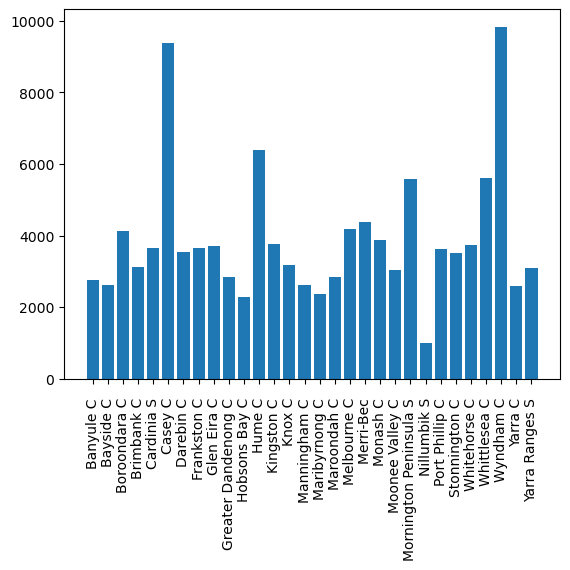

In [15]:
pivot_housing_with_train=pivot_housing.loc[pivot_housing["With train "]=="Yes",:]
pivot_housing_with_train
plt.bar(pivot_housing_with_train["City Council"],pivot_housing_with_train["Total Number of Sales_2021"])
plt.xticks(rotation=90)
plt.show()